<a href="https://colab.research.google.com/github/Haidarly2/PCVK_Semester_5/blob/main/Pertemuan_10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [21]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import pandas as pd

## **Threshold global dengan library**

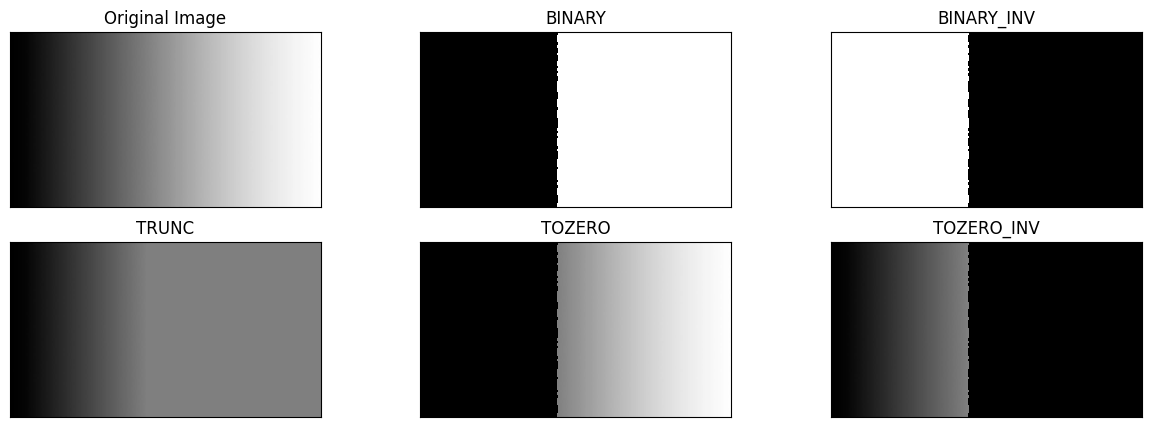

In [4]:
filename = ('/content/drive/MyDrive/PCVK/Images/gradient.jpg')
img = cv.imread(filename)
thresh = 127 #nilai Threshold yang

#1. thresh1 jika pixel di img>127, maka thresh1 bernilai 1(putih) selain itu bernilai 0(hitam)
ret,thresh1 = cv.threshold(img,thresh,255,cv.THRESH_BINARY)
#2. thresh2 adalah binary threshold inverse
ret,thresh2 = cv.threshold(img,thresh,255,cv.THRESH_BINARY_INV)
#3. Threshold Truncate
ret,thresh3 = cv.threshold(img,thresh,255,cv.THRESH_TRUNC)
#4. Threshold Tozero
ret,thresh4 = cv.threshold(img,thresh,255,cv.THRESH_TOZERO)
#5. Threshold Tozero Inverse
ret,thresh5 = cv.threshold(img,thresh,255,cv.THRESH_TOZERO_INV)

titles = ['Original Image','BINARY','BINARY_INV','TRUNC', 'TOZERO', 'TOZERO_INV']
images = [img, thresh1, thresh2, thresh3, thresh4, thresh5]

plt.figure(figsize = (15,5))
for i in range(len(images)):
  plt.subplot(2,3,i+1),plt.imshow(images[i],'gray', interpolation='nearest')
  plt.title(titles[i])
  plt.xticks([]),plt.yticks([])
plt.show()

## **Threshold global tanpa library**

In [11]:
# Fungsi untuk setiap jenis threshold
def apply_threshold(image, thresh, type='BINARY'):
    if type == 'BINARY':
        return np.where(image > thresh, 255, 0)
    elif type == 'BINARY_INV':
        return np.where(image > thresh, 0, 255)
    elif type == 'TRUNC':
        return np.where(image > thresh, thresh, image)
    elif type == 'TOZERO':
        return np.where(image > thresh, image, 0)
    elif type == 'TOZERO_INV':
        return np.where(image > thresh, 0, image)
    else:
        raise ValueError("Unknown threshold type")

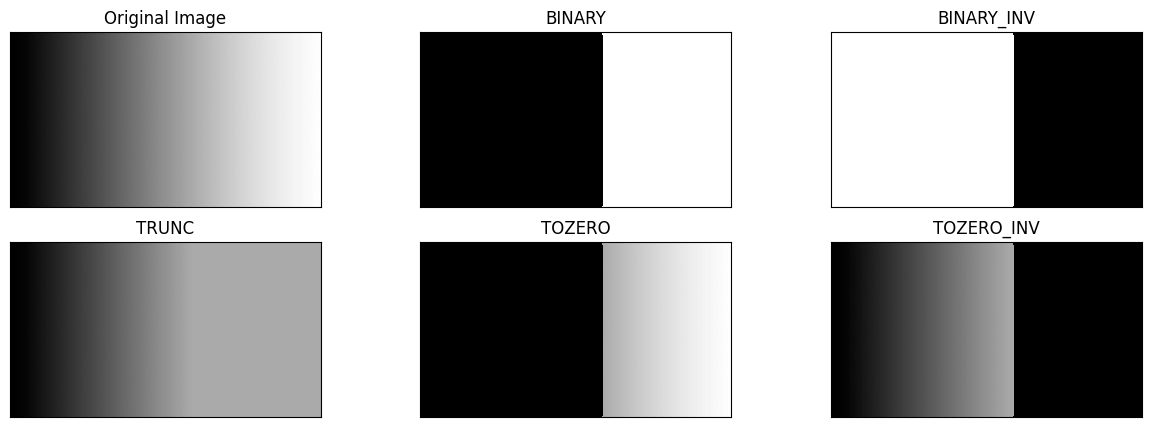

In [13]:
# Path ke file gambar
filename = '/content/drive/MyDrive/PCVK/Images/gradient.jpg'

# Membaca gambar menggunakan OpenCV dalam grayscale
image = cv.imread(filename)

# Membalik gambar secara vertikal agar konsisten dengan OpenCV (jika diperlukan)
# image = np.flipud(image)

# Nilai threshold
thresh = 170

# Menerapkan setiap jenis threshold
thresh_binary = apply_threshold(image, thresh, 'BINARY')
thresh_binary_inv = apply_threshold(image, thresh, 'BINARY_INV')
thresh_trunc = apply_threshold(image, thresh, 'TRUNC')
thresh_tozero = apply_threshold(image, thresh, 'TOZERO')
thresh_tozero_inv = apply_threshold(image, thresh, 'TOZERO_INV')

# Membuat judul dan daftar gambar
titles = ['Original Image', 'BINARY', 'BINARY_INV', 'TRUNC', 'TOZERO', 'TOZERO_INV']
images = [image, thresh_binary, thresh_binary_inv, thresh_trunc, thresh_tozero, thresh_tozero_inv]

# Menampilkan hasil
plt.figure(figsize=(15, 5))
for i in range(len(images)):
    plt.subplot(2, 3, i + 1)
    plt.imshow(images[i], cmap='gray', interpolation='nearest')
    plt.title(titles[i])
    plt.xticks([]), plt.yticks([])

plt.show()

## **Threshold Otsu dengan library**

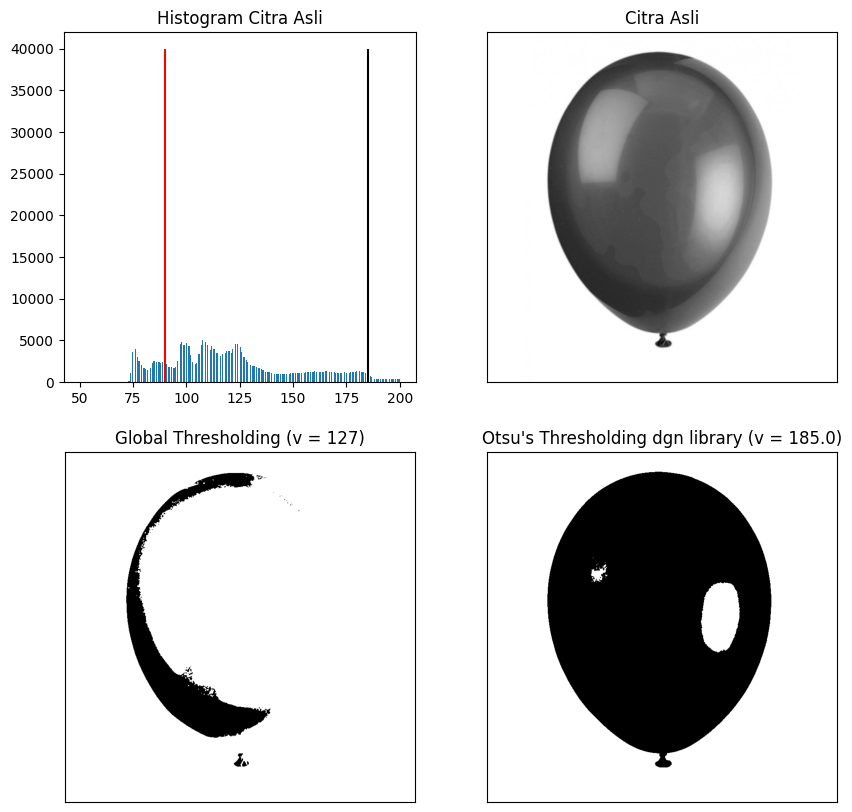

In [14]:
# Dengan Library
filename = ('/content/drive/MyDrive/PCVK/Images/balloon.jpg')
img = cv.imread(filename,0)
blur = cv.GaussianBlur(img,(5,5),0)
thresh = 90

ret,th1 = cv.threshold(blur,thresh,255,cv.THRESH_BINARY)
ret2,th2 = cv.threshold(blur,0,255,cv.THRESH_BINARY+cv.THRESH_OTSU)

x = ("Otsu's Thresholding dgn library (v = ")+str(ret2)+")"
titles = ['Citra Asli', 'Global Thresholding (v = 127)', x]
citra3 = [blur, th1, th2]

plt.figure(figsize = (10,10))
plt.subplot(2,2,1),plt.hist(blur.ravel(),256,[50,200])
plt.vlines(ret,0,40000,colors='red') #garis vertikal merah menunjukan threshold global 127
plt.vlines(ret2,0,40000,colors='black') #garis vertikal hitam menunjukkan threshold 92 hasil otsu's
plt.title('Histogram Citra Asli')
for i in range(len(citra3)):
  plt.subplot(2,2,i+2),plt.imshow(citra3[i],'gray')
  plt.title(titles[i])
  plt.xticks([]),plt.yticks([])
plt.show()

## **Threshold otsu tanpa library**

In [15]:
# Fungsi untuk thresholding Otsu manual
def otsu_threshold(image):
    # Hitung histogram dan total piksel
    hist, bins = np.histogram(image.ravel(), 256, [0, 256])
    total_pixels = image.shape[0] * image.shape[1]

    # Inisialisasi variabel untuk Otsu
    current_max = 0
    threshold = 0
    sum_total, sum_background = 0, 0
    weight_background, weight_foreground = 0, 0

    # Menghitung sum total
    for i in range(256):
        sum_total += i * hist[i]

    # Loop untuk setiap intensitas
    for i in range(256):
        # Update weight background dan foreground
        weight_background += hist[i]
        if weight_background == 0:
            continue

        weight_foreground = total_pixels - weight_background
        if weight_foreground == 0:
            break

        # Update sum background
        sum_background += i * hist[i]

        # Hitung rata-rata
        mean_background = sum_background / weight_background
        mean_foreground = (sum_total - sum_background) / weight_foreground

        # Hitung variansi antar-kelas
        var_between = weight_background * weight_foreground * (mean_background - mean_foreground) ** 2

        # Cari nilai threshold optimal dengan varian maksimum
        if var_between > current_max:
            current_max = var_between
            threshold = i

    # Terapkan threshold
    binary_output = np.where(image > threshold, 255, 0).astype(np.uint8)

    return binary_output, threshold

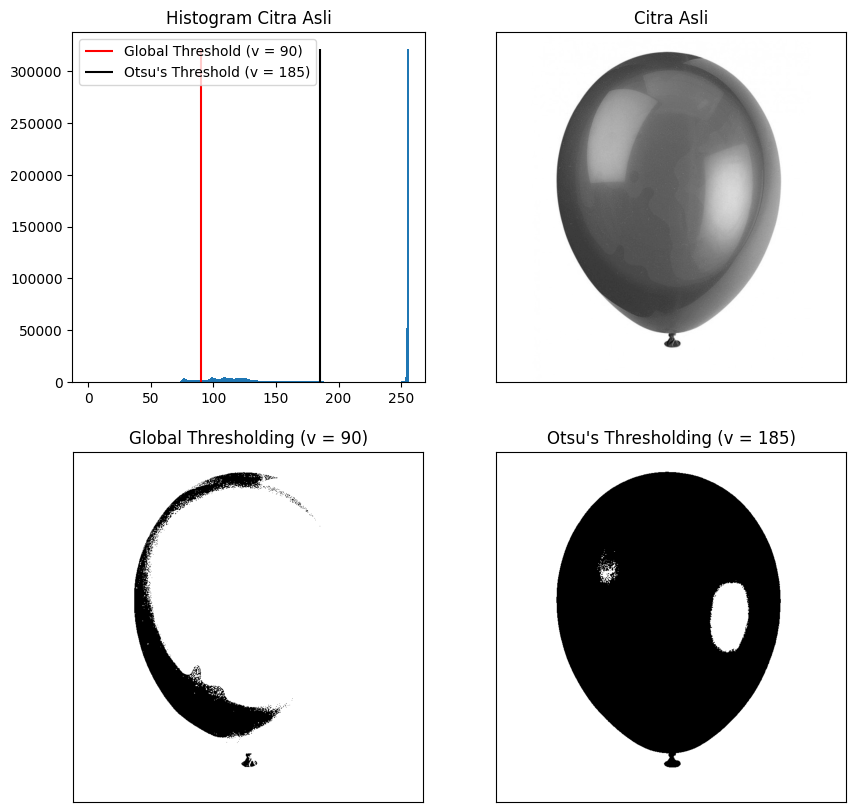

In [17]:
# Path ke file gambar
filename = '/content/drive/MyDrive/PCVK/Images/balloon.jpg'

# Membaca gambar dalam grayscale
image = cv.imread(filename,0)

# Menghitung histogram untuk plotting
hist, bins = np.histogram(image.ravel(), 256, [0, 256])

# Menjalankan Otsu Thresholding manual
otsu_binary, otsu_threshold_value = otsu_threshold(image)

# Threshold global untuk perbandingan
global_thresh = 90
global_binary = np.where(image > global_thresh, 255, 0).astype(np.uint8)

# Menampilkan hasil
titles = ['Citra Asli', f'Global Thresholding (v = {global_thresh})', f"Otsu's Thresholding (v = {otsu_threshold_value})"]
images = [image, global_binary, otsu_binary]

plt.figure(figsize=(10, 10))
plt.subplot(2, 2, 1)
plt.hist(image.ravel(), 256, [0, 256])
plt.vlines(global_thresh, 0, np.max(hist), colors='red', label=f'Global Threshold (v = {global_thresh})')
plt.vlines(otsu_threshold_value, 0, np.max(hist), colors='black', label=f"Otsu's Threshold (v = {otsu_threshold_value})")
plt.title('Histogram Citra Asli')
plt.legend()

for i in range(len(images)):
    plt.subplot(2, 2, i + 2)
    plt.imshow(images[i], cmap='gray')
    plt.title(titles[i])
    plt.xticks([]), plt.yticks([])

plt.show()

## **Segmentasi beserta pengamatan histogram**

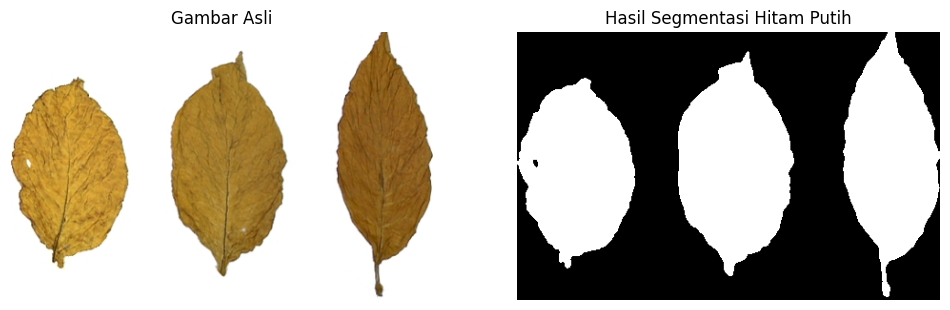

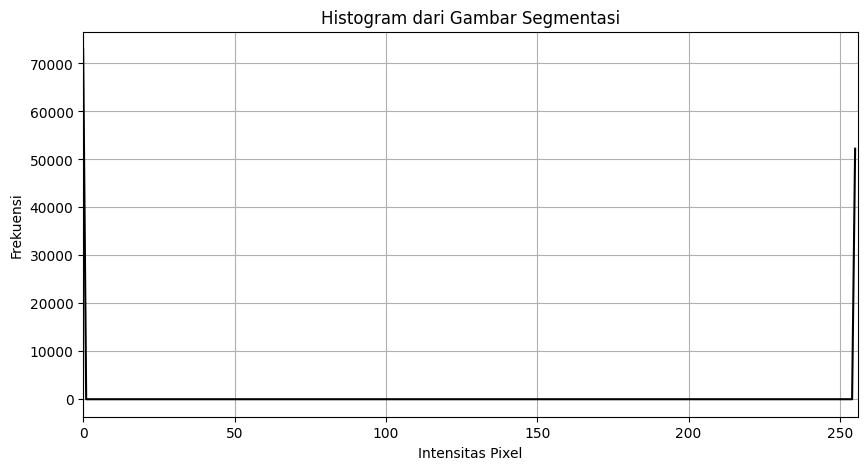

In [23]:
# Membaca gambar
filename = '/content/drive/MyDrive/PCVK/Images/tobacco.jpg'
image = cv.imread(filename)

# Konversi ke grayscale
gray = cv.cvtColor(image, cv.COLOR_BGR2GRAY)

# Gaussian Blur untuk mengurangi noise
blurred = cv.GaussianBlur(gray, (5, 5), 0)

# Thresholding Otsu untuk mendapatkan mask
_, otsu_mask = cv.threshold(blurred, 0, 255, cv.THRESH_BINARY + cv.THRESH_OTSU)

# Membalik mask untuk mendapatkan hasil hitam putih
result_bw = cv.bitwise_not(otsu_mask)

# Menghitung histogram dari gambar segmentasi
hist = cv.calcHist([result_bw], [0], None, [256], [0, 256])

# Menampilkan hasil
plt.figure(figsize=(12, 6))

# Menampilkan gambar asli dan hasil segmentasi
plt.subplot(1, 2, 1)
plt.imshow(cv.cvtColor(image, cv.COLOR_BGR2RGB))
plt.title("Gambar Asli")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(result_bw, cmap='gray')
plt.title("Hasil Segmentasi Hitam Putih")
plt.axis('off')

plt.show()

# Menampilkan histogram
plt.figure(figsize=(10, 5))
plt.plot(hist, color='black')
plt.title('Histogram dari Gambar Segmentasi')
plt.xlim([0, 256])
plt.xlabel('Intensitas Pixel')
plt.ylabel('Frekuensi')
plt.grid()
plt.show()

## **Segmentasi Warna**